In [1]:
import findspark
findspark.init()

from pyspark import SparkContext, SparkConf, SQLContext

from pyspark.sql import SparkSession
from pyspark.sql import functions as F
import os

CLICKHOUSE_IP = "34.32.60.106"
CLICKHOUSE_PORT = 9000
CLICKHOUSE_USER = "default"
CLICKHOUSE_USER_PASSWORD = "1278"

#https://repo1.maven.org/maven2/com/github/housepower/clickhouse-native-jdbc/2.7.1/clickhouse-native-jdbc-2.7.1.jar
packages = [
    "com.github.housepower:clickhouse-spark-runtime-3.4_2.12:0.7.3",
    "com.clickhouse:clickhouse-jdbc:0.6.0-patch4",
    "com.clickhouse:clickhouse-http-client:0.6.0-patch4",
    "org.apache.httpcomponents.client5:httpclient5:5.3.1",
    "com.github.housepower:clickhouse-native-jdbc:2.7.1"
]
ram = 30
cpu = 22*3
# Define the application name and setup session
appName = "Connect To ClickHouse via PySpark"
spark = (SparkSession.builder
         .appName(appName)
         .config("spark.jars.packages", ",".join(packages))
         .config("spark.sql.catalog.clickhouse", "xenon.clickhouse.ClickHouseCatalog")
         .config("spark.sql.catalog.clickhouse.host", CLICKHOUSE_IP)
         .config("spark.sql.catalog.clickhouse.protocol", "http")
         .config("spark.sql.catalog.clickhouse.http_port", "8123")
         .config("spark.sql.catalog.clickhouse.user", CLICKHOUSE_USER)
         .config("spark.sql.catalog.clickhouse.password", CLICKHOUSE_USER_PASSWORD)
         .config("spark.sql.catalog.clickhouse.database", "default")
         #.config("spark.spark.clickhouse.write.compression.codec", "lz4")
         #.config("spark.clickhouse.read.compression.codec", "lz4")
         #.config("spark.clickhouse.write.format", "arrow")
         #    .config("spark.clickhouse.write.distributed.convertLocal", "true") 
         #    .config("spark.clickhouse.write.repartitionNum", "1") 
         #.config("spark.clickhouse.write.maxRetry", "1000")
         #    .config("spark.clickhouse.write.repartitionStrictly", "true") 
         #    .config("spark.clickhouse.write.distributed.useClusterNodes", "false") 
         #.config("spark.clickhouse.write.batchSize", "1000000")
         #.config("spark.sql.catalog.clickhouse.socket_timeout", "600000000")
         #  .config("spark.sql.catalog.clickhouse.connection_timeout", "600000000")
         #  .config("spark.sql.catalog.clickhouse.query_timeout", "600000000")
         #  .config("spark.clickhouse.options.socket_timeout", "600000000")
         #  .config("spark.clickhouse.options.connection_timeout", "600000000")
         #  .config("spark.clickhouse.options.query_timeout", "600000000")         
         .config("spark.executor.memory", f"{ram}g")
         #.config("spark.executor.cores", "5")
         .config("spark.driver.maxResultSize", f"{ram}g")
         #.config("spark.driver.memory", f"{ram}g")
         #.config("spark.executor.memoryOverhead", f"{ram}g")
         #.config("spark.sql.debug.maxToStringFields", "100000")
         .getOrCreate()
         )
#SedonaRegistrator.registerAll(spark)
# spark.conf.set("spark.sql.catalog.clickhouse", "xenon.clickhouse.ClickHouseCatalog")
# spark.conf.set("spark.sql.catalog.clickhouse.host", "127.0.0.1")
# spark.conf.set("spark.sql.catalog.clickhouse.protocol", "http")
# spark.conf.set("spark.sql.catalog.clickhouse.http_port", "8123")
# spark.conf.set("spark.sql.catalog.clickhouse.user", "default")
# spark.conf.set("spark.sql.catalog.clickhouse.password", "")
# spark.conf.set("spark.sql.catalog.clickhouse.database", "default")
spark.sql("use clickhouse")

from ydata_profiling import ProfileReport
import pandas as pd
import sklearn
from sklearn.model_selection import train_test_split
import mlflow
import optuna


root_path = "/app"
#root_path = "."
#path_data = f'{root_path}/data'
your_mlflow_tracking_uri = f'{root_path}/mlruns'

mlflow.set_tracking_uri(your_mlflow_tracking_uri)

import warnings
warnings.filterwarnings("ignore")

from optuna.integration.mlflow import MLflowCallback





:: loading settings :: url = jar:file:/opt/spark/jars/ivy-2.5.1.jar!/org/apache/ivy/core/settings/ivysettings.xml


Ivy Default Cache set to: /root/.ivy2/cache
The jars for the packages stored in: /root/.ivy2/jars
com.github.housepower#clickhouse-spark-runtime-3.4_2.12 added as a dependency
com.clickhouse#clickhouse-jdbc added as a dependency
com.clickhouse#clickhouse-http-client added as a dependency
org.apache.httpcomponents.client5#httpclient5 added as a dependency
com.github.housepower#clickhouse-native-jdbc added as a dependency
:: resolving dependencies :: org.apache.spark#spark-submit-parent-7668019d-fffc-4956-a552-7778694a60d8;1.0
	confs: [default]
	found com.github.housepower#clickhouse-spark-runtime-3.4_2.12;0.7.3 in central
	found com.clickhouse#clickhouse-jdbc;0.6.0-patch4 in central
	found com.clickhouse#clickhouse-http-client;0.6.0-patch4 in central
	found com.clickhouse#clickhouse-client;0.6.0-patch4 in central
	found com.clickhouse#clickhouse-data;0.6.0-patch4 in central
	found org.apache.httpcomponents.client5#httpclient5;5.3.1 in central
	found org.apache.httpcomponents.core5#httpc

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
import sklearn
sklearn.set_config(transform_output="pandas")
from sklearn.utils import compute_sample_weight
#
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import Ridge
from sklearn import metrics
from sklearn.metrics import accuracy_score
from sklearn.base import BaseEstimator, TransformerMixin
import seaborn as sns


from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import plot_tree

from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

from sklearn.neighbors import KNeighborsClassifier

from sklearn.preprocessing import RobustScaler

from sklearn.cluster import KMeans

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.svm import SVC

import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier

from sklearn.pipeline import Pipeline

from sklearn.compose import ColumnTransformer

import optuna

import mlflow

import warnings

warnings.simplefilter('ignore')

import joblib

from joblib import dump, load

import requests

client = mlflow.MlflowClient(tracking_uri = "/app/mlruns")

mlflow.set_tracking_uri("/app/mlruns")

import requests

from sklearn import impute

from sklearn.impute import KNNImputer

from sklearn.experimental import enable_iterative_imputer

from sklearn.impute import IterativeImputer

from imblearn.over_sampling import SMOTE

from imblearn.pipeline import Pipeline

from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import roc_curve, auc, roc_auc_score
from sklearn.metrics import precision_recall_curve, average_precision_score

In [3]:
data = spark.read.csv('files/train.csv', header=True, inferSchema=True)
data.show()

AnalysisException: [PATH_NOT_FOUND] Path does not exist: file:/app/files/train.csv.

In [12]:
import clickhouse_connect
import pandas as pd

# Define your ClickHouse connection details
CLICKHOUSE_IP = "34.32.60.106"
CLICKHOUSE_USER = "default"
CLICKHOUSE_USER_PASSWORD = "1278"
DATABASE = "bank"
TABLE = "salaryincome"

# Create a ClickHouse client
client = clickhouse_connect.get_client(host=CLICKHOUSE_IP,
                                       username=CLICKHOUSE_USER,
                                       password=CLICKHOUSE_USER_PASSWORD)

# Load data
data = pd.read_csv('/opt/spark/work-dir/files/train.csv')

# Rename columns to avoid issues with special characters
data.rename(columns={
    'educational-num': 'educational_num',
    'marital-status': 'marital_status',
    'capital-gain': 'capital_gain',
    'capital-loss': 'capital_loss',
    'hours-per-week': 'hours_per_week',
    'native-country': 'native_country',
    'income_>50K': 'income_50K'
}, inplace=True)

# Define a mapping for categorical columns to integer values
categorical_columns = [
    'workclass', 'education', 'marital_status', 'occupation',
    'relationship', 'race', 'gender', 'native_country'
]

# Convert categorical columns to integers
for column in categorical_columns:
    data[column] = data[column].astype('category').cat.codes

# Convert remaining columns to appropriate integer types
for column in data.columns:
    if column == 'age':
        data[column] = data[column].astype('uint8')
    else:
        data[column] = data[column].astype('uint32')

# Define the ClickHouse table schema if not already defined
client.command(f"""
CREATE TABLE IF NOT EXISTS {DATABASE}.{TABLE} (
    age UInt8,
    workclass UInt32,
    fnlwgt UInt32,
    education UInt32,
    educational_num UInt32,
    marital_status UInt32,
    occupation UInt32,
    relationship UInt32,
    race UInt32,
    gender UInt32,
    capital_gain UInt32,
    capital_loss UInt32,
    hours_per_week UInt32,
    native_country UInt32,
    income_50K UInt32 
) ENGINE = MergeTree()
ORDER BY income_50K
""")

# Convert DataFrame to a list of tuples for insertion
data_tuples = [tuple(x) for x in data.to_numpy()]

# Insert data into ClickHouse
client.insert(f'{DATABASE}.{TABLE}', data)

# Close the ClickHouse client
client.close()


In [5]:
df = client.query('SELECT * FROM bank.salaryincome')
df.result_columns

[[26,
  37,
  18,
  28,
  42,
  27,
  28,
  51,
  46,
  42,
  48,
  65,
  27,
  37,
  35,
  28,
  34,
  36,
  50,
  60,
  40,
  35,
  40,
  29,
  64,
  71,
  37,
  41,
  40,
  26,
  20,
  32,
  48,
  36,
  73,
  48,
  45,
  20,
  55,
  22,
  49,
  56,
  50,
  23,
  37,
  36,
  72,
  64,
  54,
  46,
  32,
  46,
  65,
  49,
  45,
  30,
  72,
  40,
  56,
  33,
  51,
  23,
  41,
  38,
  17,
  49,
  23,
  35,
  29,
  29,
  33,
  67,
  45,
  56,
  54,
  55,
  33,
  26,
  39,
  45,
  60,
  18,
  27,
  68,
  33,
  38,
  20,
  59,
  39,
  61,
  51,
  25,
  76,
  67,
  37,
  41,
  49,
  43,
  37,
  58,
  35,
  29,
  25,
  24,
  51,
  38,
  19,
  45,
  53,
  23,
  33,
  62,
  22,
  54,
  31,
  23,
  56,
  30,
  23,
  61,
  66,
  53,
  52,
  80,
  58,
  40,
  37,
  73,
  60,
  80,
  42,
  29,
  43,
  68,
  53,
  53,
  30,
  51,
  50,
  62,
  33,
  18,
  49,
  27,
  41,
  47,
  48,
  56,
  49,
  38,
  62,
  52,
  43,
  40,
  28,
  67,
  58,
  28,
  36,
  50,
  77,
  50,
  17,
  25,
  24,
  25,
  30

In [8]:
df = client.query('SELECT * FROM bank.salaryincome')
df.result_rows

[(26, 3, 297991, 9, 13, 2, 11, 1, 1, 0, 0, 1977, 75, 0),
 (37, 3, 191342, 3, 2, 2, 2, 0, 1, 1, 0, 0, 40, 0),
 (18, 4294967295, 261276, 15, 10, 4, 4294967295, 3, 2, 0, 0, 1602, 40, 0),
 (28, 3, 149769, 11, 9, 4, 6, 1, 1, 1, 0, 0, 40, 0),
 (42, 5, 303044, 11, 9, 2, 4, 0, 1, 1, 0, 0, 40, 0),
 (27, 3, 292472, 15, 10, 2, 9, 0, 1, 1, 0, 0, 40, 0),
 (28, 3, 252424, 8, 11, 4, 13, 3, 2, 1, 0, 0, 40, 0),
 (51, 3, 63685, 11, 9, 2, 11, 0, 1, 1, 0, 0, 50, 0),
 (46, 3, 104632, 11, 9, 2, 6, 0, 1, 1, 0, 0, 40, 0),
 (42, 5, 342634, 8, 11, 0, 2, 1, 4, 1, 0, 0, 40, 0),
 (48, 3, 350440, 15, 10, 2, 2, 2, 1, 1, 0, 0, 40, 0),
 (65, 3, 255386, 11, 9, 4, 2, 2, 1, 1, 0, 0, 40, 0),
 (27, 3, 292472, 15, 10, 4, 2, 1, 1, 1, 0, 1876, 45, 0),
 (37, 6, 67083, 15, 10, 2, 9, 2, 1, 1, 0, 0, 40, 0),
 (35, 3, 93034, 11, 9, 4, 6, 1, 1, 1, 0, 0, 40, 0),
 (28, 3, 129624, 9, 13, 2, 11, 0, 4, 1, 0, 0, 45, 0),
 (34, 0, 67083, 9, 13, 4, 3, 4, 1, 1, 1471, 0, 40, 0),
 (36, 3, 116138, 11, 9, 2, 9, 0, 1, 1, 0, 0, 40, 0),
 (50, 3, 135

In [9]:
result = client.query('DESCRIBE table bank.salaryincome')
column_names = result.result_columns[0]
column_names

['age',
 'education',
 'workclass',
 'fnlwgt',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country',
 'income_>50K']

In [10]:
df = client.query('SELECT * FROM bank.salaryincome')
df = pd.DataFrame(df.result_rows, columns=column_names)
df

,age,education,workclass,fnlwgt,marital_status,occupation,relationship,race,gender,capital_gain,capital_loss,hours_per_week,native_country,income_>50K
0,26,3,297991,9,13,2,11,1,1,0,0,1977,75,0
1,37,3,191342,3,2,2,2,0,1,1,0,0,40,0
2,18,4294967295,261276,15,10,4,4294967295,3,2,0,0,1602,40,0
3,28,3,149769,11,9,4,6,1,1,1,0,0,40,0
4,42,5,303044,11,9,2,4,0,1,1,0,0,40,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175823,45,5,163559,9,13,2,3,5,1,0,0,0,48,4294967295
175824,23,3,216672,9,13,4,3,3,4,1,0,0,30,4294967295
175825,29,3,144259,9,13,2,5,0,2,1,4386,0,80,4294967295
175826,54,4,304570,9,13,2,6,0,1,1,7688,0,40,4294967295


In [9]:
!pip install ydata-profiling

In [14]:
!pip install catboost

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 98.2/98.2 MB 4.9 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.3/17.3 MB 5.7 MB/s eta 0:00:0000:0100:01
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 47.1/47.1 KB 2.9 MB/s eta 0:00:00


In [52]:
categorical_columns

[]

In [53]:
numerical_columns

['age',
 'education',
 'workclass',
 'fnlwgt',
 'marital_status',
 'occupation',
 'relationship',
 'race',
 'gender',
 'capital_gain',
 'capital_loss',
 'hours_per_week',
 'native_country']

In [16]:
# create a catboost pipline

from catboost import CatBoostClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix 
from sklearn.model_selection import cross_val_score
import sklearn
sklearn.set_config(transform_output="pandas")

#df = pd.read_csv('files/train.csv', low_memory=False)
df = pd.read_csv('/opt/spark/work-dir/files/train.csv')
# Define the features and target
y = df['income_>50K']
X = df.drop(columns=['income_>50K'], axis=1)

print(X.columns)


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define the categorical and numerical columns
#categorical_columns = X.select_dtypes(include=['uint32']).columns
#numerical_columns = X.select_dtypes(include=['uint8']).columns
categorical_columns = list(X_train.select_dtypes(include=['object']).columns)
numerical_columns = list(X_train.select_dtypes(exclude=['object']).columns)

# Define the preprocessing steps
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    #('onehot', OneHotEncoder(handle_unknown='ignore'))
])

numerical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='mean')),
    ('scaler', StandardScaler())
])

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numerical_transformer, numerical_columns),
        ('cat', categorical_transformer, categorical_columns)
    ]
)

# Define the CatBoost model
model = CatBoostClassifier(iterations=1000,
                           learning_rate=0.1,
                           depth=6,
                           loss_function='Logloss',
                           verbose=False,
                           cat_features= ['cat__' + col for col in categorical_columns]
                           )

# Create the pipeline
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('model', model)
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_pred = pipeline.predict(X_test)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy: {accuracy:.2f}')



Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country'],
      dtype='object')
Accuracy: 0.88


In [20]:
['cat__' + col for col in categorical_columns]
    

['cat__workclass',
 'cat__education',
 'cat__marital-status',
 'cat__occupation',
 'cat__relationship',
 'cat__race',
 'cat__gender',
 'cat__native-country']

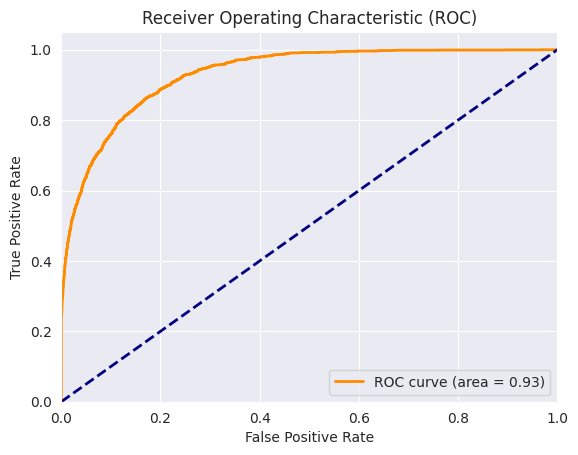

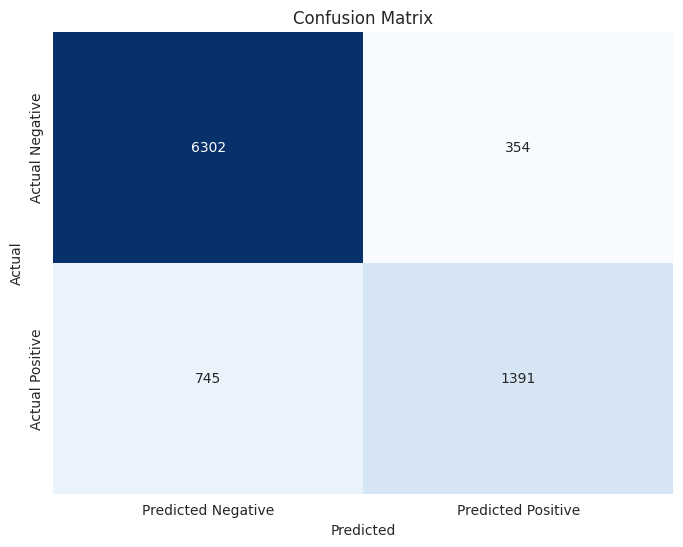


f1_test_macro: 0.8183120723370976

f1_test_micro: 0.875

f1_test_weighted: 0.8795133332755437

precision: 0.7990160661552866

recall: 0.8457079624608086

accuracy: 0.875


y_test  pred_test
0       0            0.716788
1       1            0.158212
        0            0.084736
0       1            0.040264
Name: proportion, dtype: float64

In [17]:
y_probs = pipeline.predict_proba(X_test)[:, 1]

pred_test = y_probs > 0.5

f1_test = f1_score(pred_test, y_test, average='macro')


f1_test_1 = f1_score(pred_test, y_test, average='micro')


f1_test_2 = f1_score(pred_test, y_test, average='weighted')

accuracy = accuracy_score(pred_test, y_test)

precision = precision_score(pred_test, y_test, average='macro')

recall = recall_score(pred_test, y_test, average='macro')






fpr, tpr, thresholds = roc_curve(y_test, y_probs)
auc = roc_auc_score(y_test, y_probs)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (area = {auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

cm = confusion_matrix(y_test, pred_test)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Predicted Negative', 'Predicted Positive'], yticklabels=['Actual Negative', 'Actual Positive'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

print(f'''
f1_test_macro: {f1_test}

f1_test_micro: {f1_test_1}

f1_test_weighted: {f1_test_2}

precision: {precision}

recall: {recall}

accuracy: {accuracy}

''')

#print('f1_test_macro:', f1_test, 'f1_test_micro:', f1_test_1, 'f1_test_weighted:', f1_test_2, 'accuracy:', accuracy, 'precision:', precision, 'recall:', recall)

y_test.value_counts(normalize=True)

un = pd.DataFrame({'y_test': y_test, 'pred_test': pred_test})
un['pred_test'] = un['pred_test'].astype('int')
un.value_counts(normalize=True)


In [19]:
counter = 0

In [21]:
import optuna
from catboost import CatBoostClassifier
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import Pipeline

# Создание объекта пайплайна (замените на ваш реальный пайплайн)
# Пример пайплайна может включать, например, предобработку данных и CatBoostClassifier
pipe = Pipeline([
    # ('preprocessor', ...),  # Пример: предобработка данных
    ('classifier', CatBoostClassifier(silent=True))  # Используем CatBoostClassifier
])

def gridsearch_replacement(trial):
    params = {
        'classifier__iterations': trial.suggest_int('classifier__iterations', 50, 300),
        'classifier__learning_rate': trial.suggest_float('classifier__learning_rate', 0.01, 0.3),
        'classifier__depth': trial.suggest_int('classifier__depth', 4, 10),
        'classifier__l2_leaf_reg': trial.suggest_int('classifier__l2_leaf_reg', 1, 10),
        'classifier__border_count': trial.suggest_int('classifier__border_count', 32, 255),
        'classifier__bagging_temperature': trial.suggest_float('classifier__bagging_temperature', 0, 1),
    }

    # Установка параметров в пайплайн
    pipe.set_params(**params)

    # Оценка модели с помощью кросс-валидации
    score = cross_val_score(pipe, X_train, y_train, cv=5, scoring='f1_macro').mean()

    return score

# Создание и оптимизация исследования Optuna
study = optuna.create_study(direction='maximize')
study.optimize(gridsearch_replacement, n_trials=10)


[I 2024-07-30 20:14:51,459] A new study created in memory with name: no-name-1c709ae9-834c-4c8e-a677-6a35eb6368dc
[W 2024-07-30 20:14:51,495] Trial 0 failed with parameters: {'classifier__iterations': 137, 'classifier__learning_rate': 0.09148879464536167, 'classifier__depth': 6, 'classifier__l2_leaf_reg': 7, 'classifier__border_count': 44, 'classifier__bagging_temperature': 0.2780133372942335} because of the following error: ValueError('\nAll the 5 fits failed.\nIt is very likely that your model is misconfigured.\nYou can try to debug the error by setting error_score=\'raise\'.\n\nBelow are more details about the failures:\n--------------------------------------------------------------------------------\n1 fits failed with the following error:\nTraceback (most recent call last):\n  File "_catboost.pyx", line 2383, in _catboost.get_float_feature\n  File "_catboost.pyx", line 1188, in _catboost._FloatOrNan\n  File "_catboost.pyx", line 983, in _catboost._FloatOrNanFromString\nTypeError: 

ValueError: 
All the 5 fits failed.
It is very likely that your model is misconfigured.
You can try to debug the error by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2383, in _catboost.get_float_feature
  File "_catboost.pyx", line 1188, in _catboost._FloatOrNan
  File "_catboost.pyx", line 983, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'b'State-gov'' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2385, in _fit
    train_params = self._prepare_train_params(
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2265, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1503, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, weight=sample_weight, group_id=group_id,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 848, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1481, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "_catboost.pyx", line 4159, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4209, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4025, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 2963, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2427, in _catboost.create_num_factor_data
  File "_catboost.pyx", line 2385, in _catboost.get_float_feature
_catboost.CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="State-gov": Cannot convert 'b'State-gov'' to float

--------------------------------------------------------------------------------
4 fits failed with the following error:
Traceback (most recent call last):
  File "_catboost.pyx", line 2383, in _catboost.get_float_feature
  File "_catboost.pyx", line 1188, in _catboost._FloatOrNan
  File "_catboost.pyx", line 983, in _catboost._FloatOrNanFromString
TypeError: Cannot convert 'b'Private'' to float

During handling of the above exception, another exception occurred:

Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 888, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/base.py", line 1473, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 473, in fit
    self._final_estimator.fit(Xt, y, **last_step_params["fit"])
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 5220, in fit
    self._fit(X, y, cat_features, text_features, embedding_features, None, sample_weight, None, None, None, None, baseline, use_best_model,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2385, in _fit
    train_params = self._prepare_train_params(
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 2265, in _prepare_train_params
    train_pool = _build_train_pool(X, y, cat_features, text_features, embedding_features, pairs,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1503, in _build_train_pool
    train_pool = Pool(X, y, cat_features=cat_features, text_features=text_features, embedding_features=embedding_features, pairs=pairs, weight=sample_weight, group_id=group_id,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 848, in __init__
    self._init(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "/usr/local/lib/python3.10/dist-packages/catboost/core.py", line 1481, in _init
    self._init_pool(data, label, cat_features, text_features, embedding_features, embedding_features_data, pairs, weight,
  File "_catboost.pyx", line 4159, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4209, in _catboost._PoolBase._init_pool
  File "_catboost.pyx", line 4025, in _catboost._PoolBase._init_features_order_layout_pool
  File "_catboost.pyx", line 2963, in _catboost._set_features_order_data_pd_data_frame
  File "_catboost.pyx", line 2427, in _catboost.create_num_factor_data
  File "_catboost.pyx", line 2385, in _catboost.get_float_feature
_catboost.CatBoostError: Bad value for num_feature[non_default_doc_idx=0,feature_idx=1]="Private": Cannot convert 'b'Private'' to float


In [18]:
study.best_params

NameError: name 'study' is not defined